<a href="https://colab.research.google.com/github/isaac-ik/Advanced-Statistical-Approaches-to-Quality/blob/main/Dry%20Bean%20classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a target="_blank" href="https://colab.research.google.com/github/isaac-ik/Advanced-Statistical-Approaches-to-Quality/blob/main/Dry%20Bean%20classifiers.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [62]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 55.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 99.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 88.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 90.0 MB/s eta 0:00:00
   ━━

In [1]:
pip install pca

  Using cached matplotlib-3.10.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached matplotlib-3.10.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.6 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.5
    Uninstalling matplotlib-3.7.5:
      Successfully uninstalled matplotlib-3.7.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.14.3 requires pandas>=2.2.0, but you have pandas 2.1.4 which is incompatible.
pycaret 3.3.2 requires matplotlib<3.8.0, but you have matplotlib 3.10.0 which is incompatible.


In [2]:
import pandas as pd
import numpy as np

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

## Data Description

Images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. A total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains<br>

Link: https://archive.ics.uci.edu/dataset/602/dry+bean+dataset <br>

1.) Area (A): The area of a bean zone and the number of pixels within its boundaries.
<br>
2.) Perimeter (P): Bean circumference is defined as the length of its border.
<br>
3.) Major axis length (L): The distance between the ends of the longest line that can be drawn from a bean.<br>
4.) Minor axis length (l): The longest line that can be drawn from the bean while standing perpendicular to the main axis.<br>
5.) Aspect ratio (K): Defines the relationship between L and l.<br>
6.) Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.<br>
7.) Convex area (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.<br>
8.) Equivalent diameter (Ed): The diameter of a circle having the same area as a bean seed area.<br>
9.) Extent (Ex): The ratio of the pixels in the bounding box to the bean area.<br>
10.)Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.<br>
11.)Roundness (R): Calculated with the following formula: (4piA)/(P^2)<br>
12.)Compactness (CO): Measures the roundness of an object: Ed/L<br>
13.)ShapeFactor1 (SF1)<br>
14.)ShapeFactor2 (SF2)<br>
15.)ShapeFactor3 (SF3)<br>
16.)ShapeFactor4 (SF4)<br>


17.)Class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)

Data source: <br>

Murat KOKLU
Faculty of Technology,
Selcuk University,
TURKEY.
ORCID : 0000-0002-2737-2360
mkoklu@selcuk.edu.tr

Ilker Ali OZKAN
Faculty of Technology,
Selcuk University,
TURKEY.
ORCID : 0000-0002-5715-1040
ilkerozkan@selcuk.edu.tr


In [5]:
# Read dry bean data
data = pd.read_excel("https://github.com/isaac-ik/Advanced-Statistical-Approaches-to-Quality/raw/refs/heads/main/DryBeanDataset/Dry_Bean_Dataset.xlsx")

In [6]:
data

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      28395    610.291       208.178117       173.888747      1.197191   
1      28734    638.018       200.524796       182.734419      1.097356   
2      29380    624.110       212.826130       175.931143      1.209713   
3      30008    645.884       210.557999       182.516516      1.153638   
4      30140    620.134       201.847882       190.279279      1.060798   
...      ...        ...              ...              ...           ...   
13606  42097    759.696       288.721612       185.944705      1.552728   
13607  42101    757.499       281.576392       190.713136      1.476439   
13608  42139    759.321       281.539928       191.187979      1.472582   
13609  42147    763.779       283.382636       190.275731      1.489326   
13610  42159    772.237       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0          0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1          0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2          0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3          0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4          0.333680       30417     195.896503  0.773098  0.990893   0.984877   
...             ...         ...            ...       ...       ...        ...   
13606      0.765002       42508     231.515799  0.714574  0.990331   0.916603   
13607      0.735702       42494     231.526798  0.799943  0.990752   0.922015   
13608      0.734065       42569     231.631261  0.729932  0.989899   0.918424   
13609      0.741055       42667     231.653248  0.705389  0.987813   0.907906   
13610      0.786693       42600     231.686223  0.788962  0.989648   0.888380   

       Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
0         0.913358      0.007332      0.003147      0.834222      0.998724   
1         0.953861      0.006979      0.003564      0.909851      0.998430   
2         0.908774      0.007244      0.003048      0.825871      0.999066   
3         0.928329      0.007017      0.003215      0.861794      0.994199   
4         0.970516      0.006697      0.003665      0.941900      0.999166   
...            ...           ...           ...           ...           ...   
13606     0.801865      0.006858      0.001749      0.642988      0.998385   
13607     0.822252      0.006688      0.001886      0.676099      0.998219   
13608     0.822730      0.006681      0.001888      0.676884      0.996767   
13609     0.817457      0.006724      0.001852      0.668237      0.995222   
13610     0.784997      0.007001      0.001640      0.616221      0.998180   

          Class  
0         SEKER  
1         SEKER  
2         SEKER  
3         SEKER  
4         SEKER  
...         ...  
13606  DERMASON  
13607  DERMASON  
13608  DERMASON  
13609  DERMASON  
13610  DERMASON  

[13611 rows x 17 columns]

## Exploratory Data analysis

In [7]:
# Check the first few rows
print(data.head())

    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332  

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [9]:
data.describe().T

count          mean           std           min  \
Area             13611.0  53048.284549  29324.095717  20420.000000   
Perimeter        13611.0    855.283459    214.289696    524.736000   
MajorAxisLength  13611.0    320.141867     85.694186    183.601165   
MinorAxisLength  13611.0    202.270714     44.970091    122.512653   
AspectRation     13611.0      1.583242      0.246678      1.024868   
Eccentricity     13611.0      0.750895      0.092002      0.218951   
ConvexArea       13611.0  53768.200206  29774.915817  20684.000000   
EquivDiameter    13611.0    253.064220     59.177120    161.243764   
Extent           13611.0      0.749733      0.049086      0.555315   
Solidity         13611.0      0.987143      0.004660      0.919246   
roundness        13611.0      0.873282      0.059520      0.489618   
Compactness      13611.0      0.799864      0.061713      0.640577   
ShapeFactor1     13611.0      0.006564      0.001128      0.002778   
ShapeFactor2     13611.0      0.001716      0.000596      0.000564   
ShapeFactor3     13611.0      0.643590      0.098996      0.410339   
ShapeFactor4     13611.0      0.995063      0.004366      0.947687   

                          25%           50%           75%            max  
Area             36328.000000  44652.000000  61332.000000  254616.000000  
Perimeter          703.523500    794.941000    977.213000    1985.370000  
MajorAxisLength    253.303633    296.883367    376.495012     738.860153  
MinorAxisLength    175.848170    192.431733    217.031741     460.198497  
AspectRation         1.432307      1.551124      1.707109       2.430306  
Eccentricity         0.715928      0.764441      0.810466       0.911423  
ConvexArea       36714.500000  45178.000000  62294.000000  263261.000000  
EquivDiameter      215.068003    238.438026    279.446467     569.374358  
Extent               0.718634      0.759859      0.786851       0.866195  
Solidity             0.985670      0.988283      0.990013       0.994677  
roundness            0.832096      0.883157      0.916869       0.990685  
Compactness          0.762469      0.801277      0.834270       0.987303  
ShapeFactor1         0.005900      0.006645      0.007271       0.010451  
ShapeFactor2         0.001154      0.001694      0.002170       0.003665  
ShapeFactor3         0.581359      0.642044      0.696006       0.974767  
ShapeFactor4         0.993703      0.996386      0.997883       0.999733

In [10]:
sns.pairplot(data, hue='Class')
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7c6c75612b00> (for post_execute):


KeyboardInterrupt: 

In [11]:
# Separate features and target
X = data.drop(columns=['Class'])
y = data['Class']

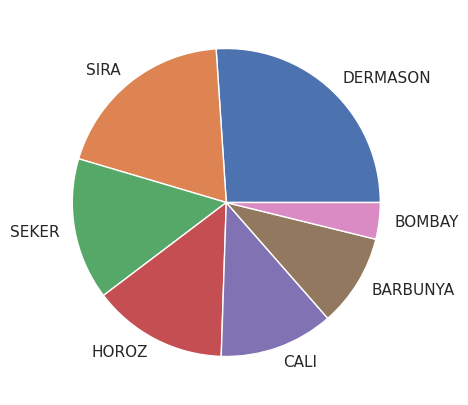

In [12]:
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

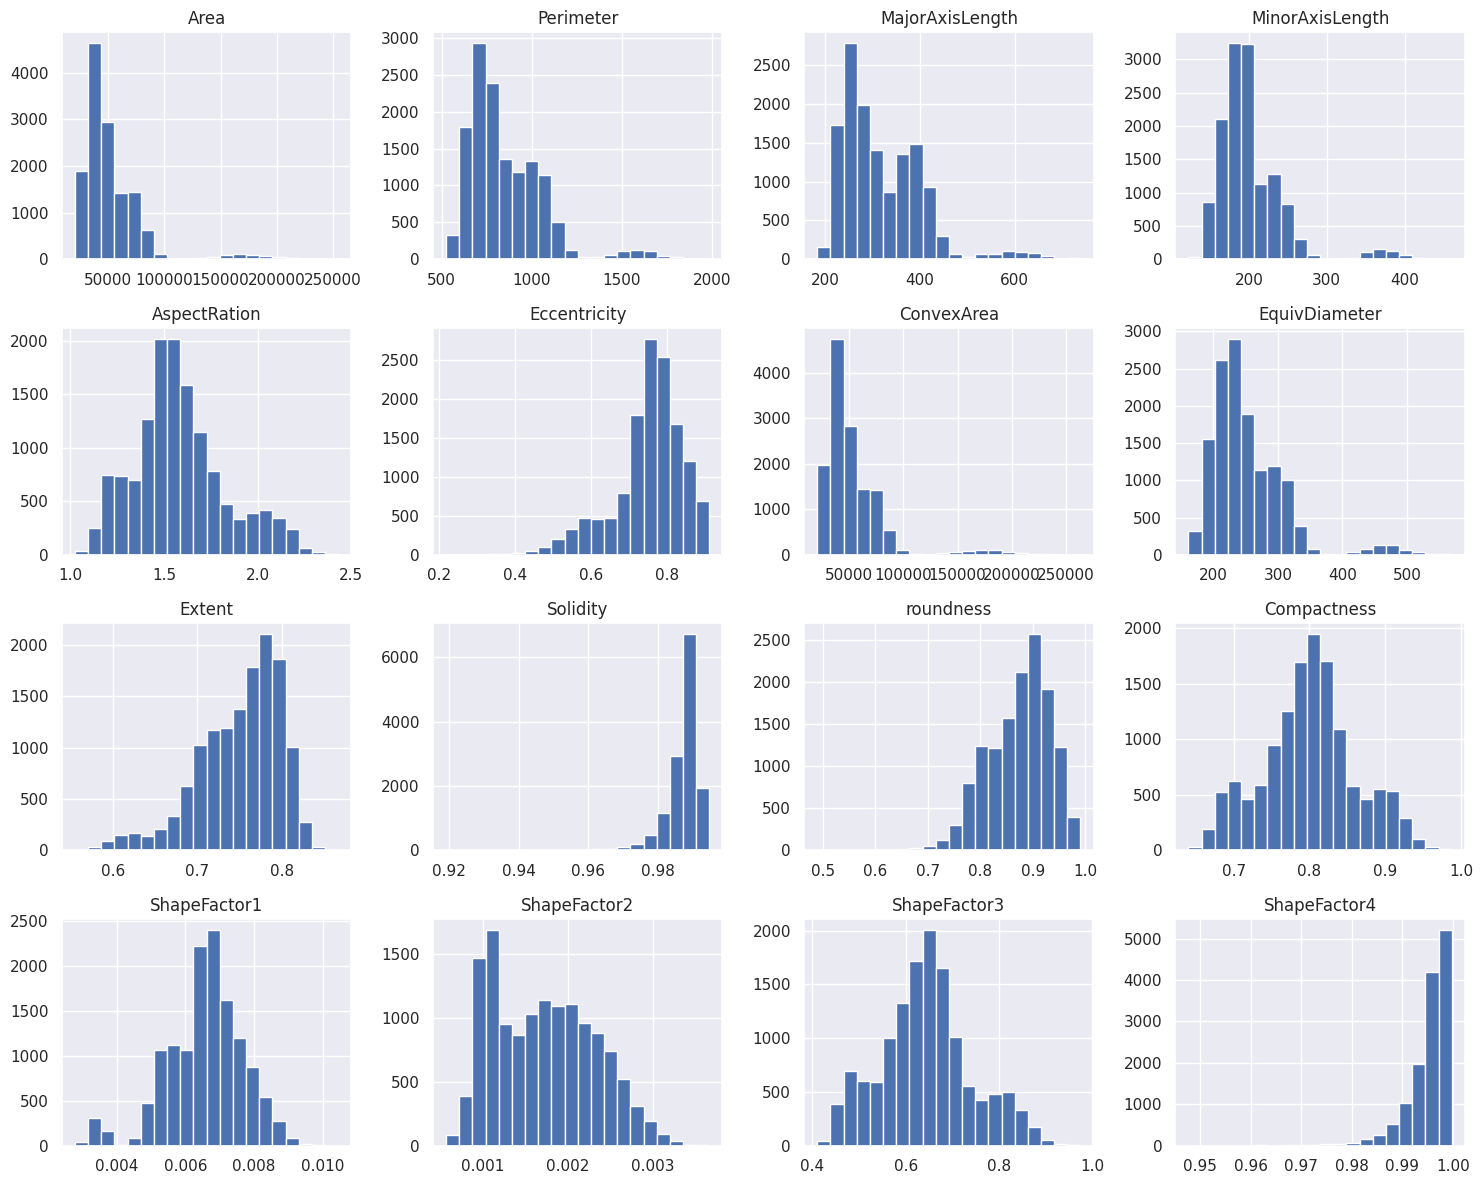

In [13]:
# Plot histograms for each feature
data.hist(figsize=(15, 12), bins=20)
plt.tight_layout()
plt.show()

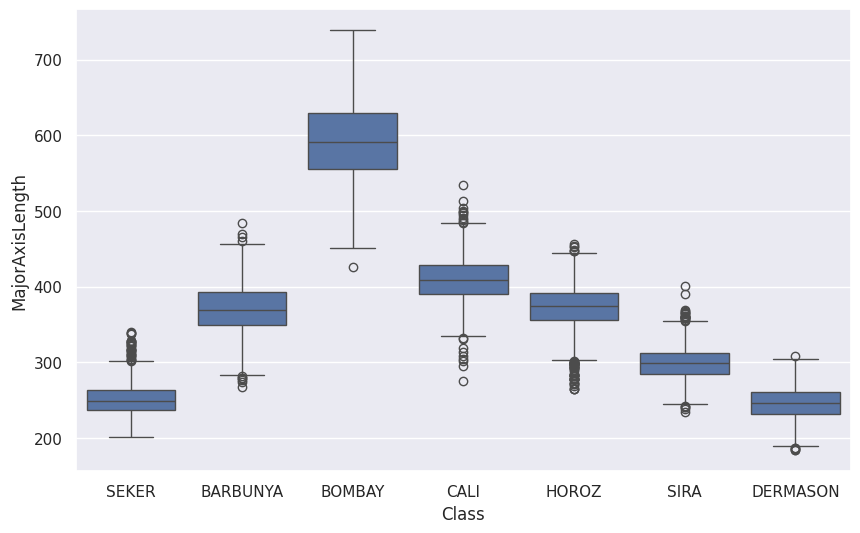

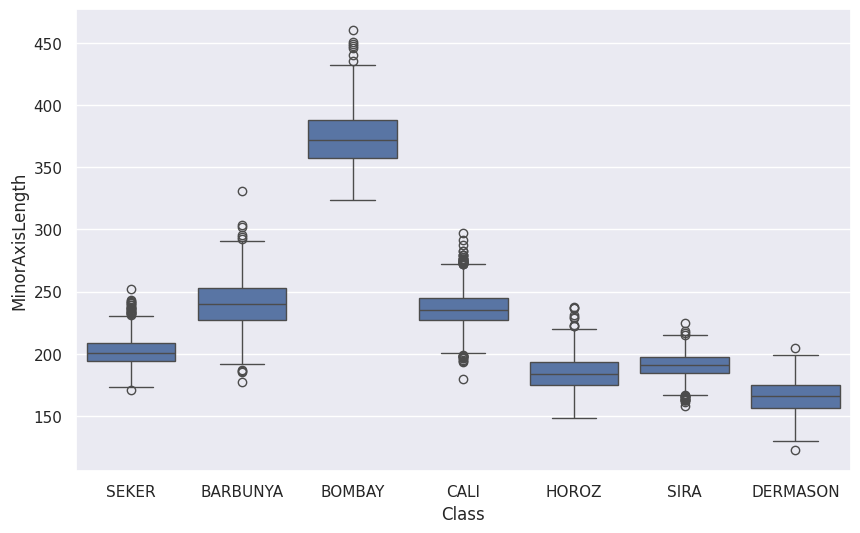

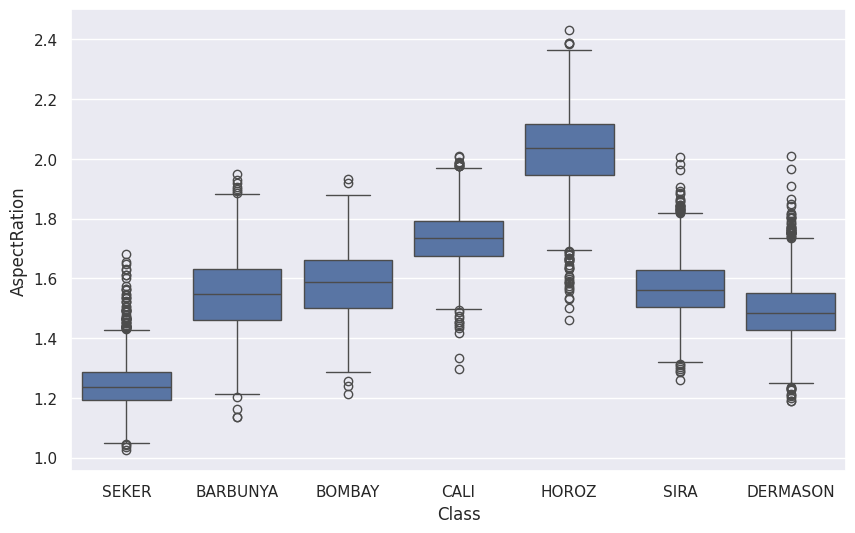

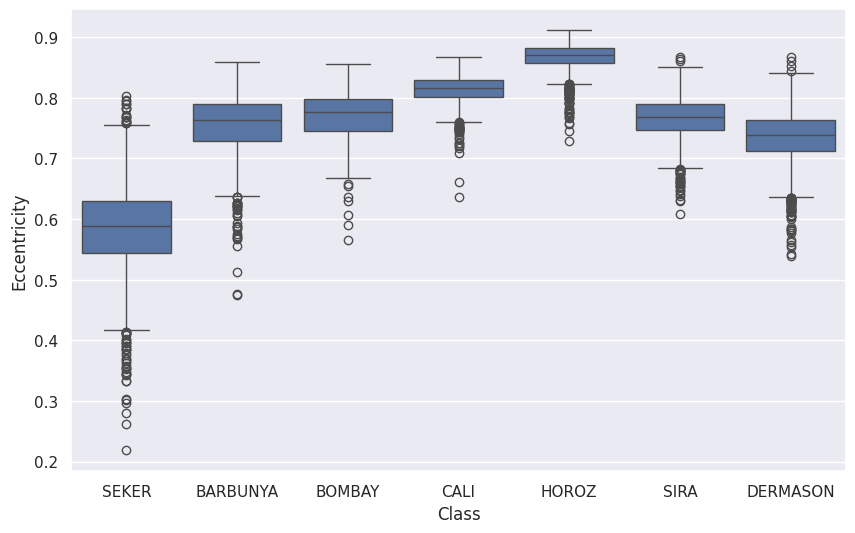

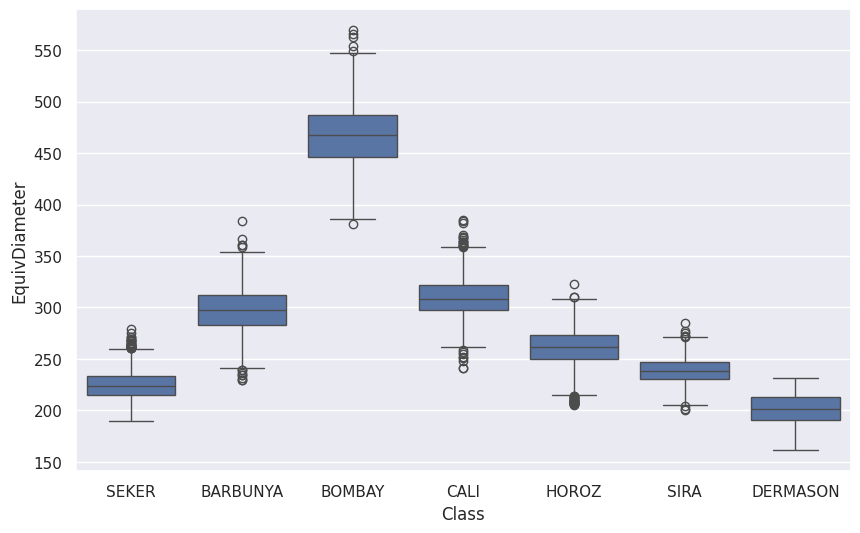

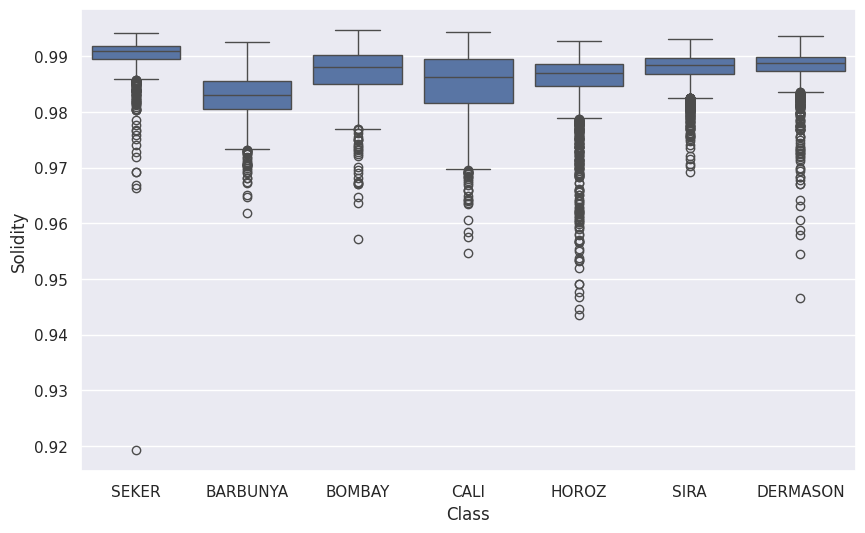

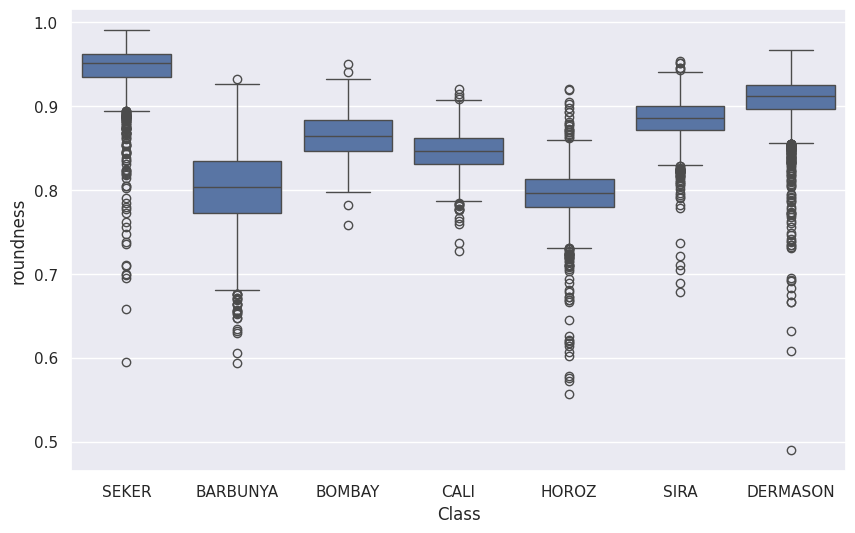

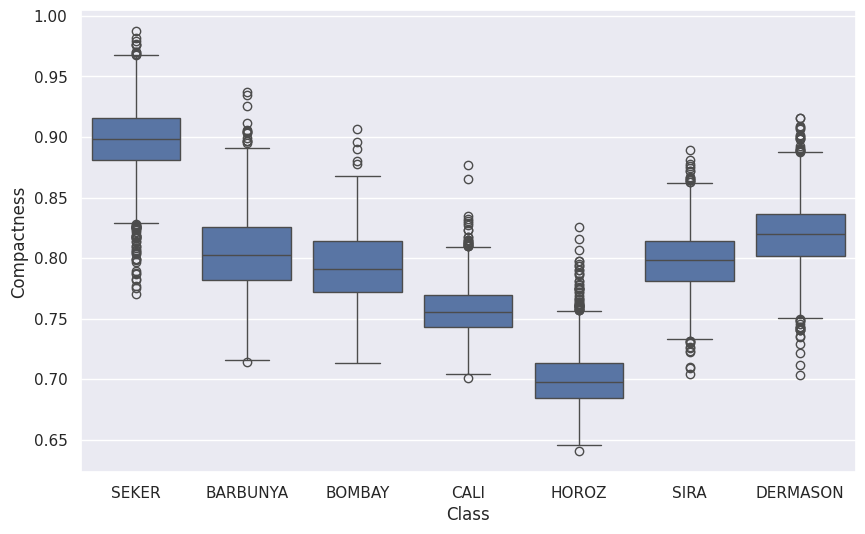

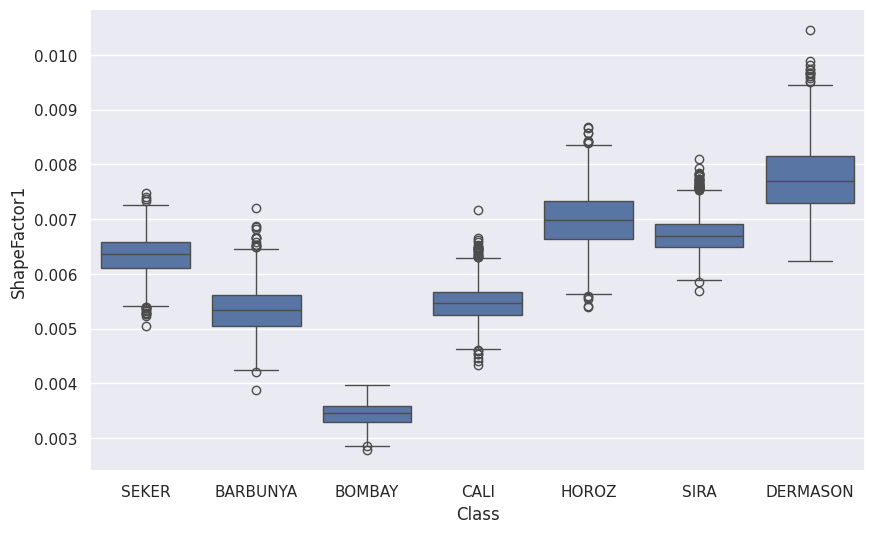

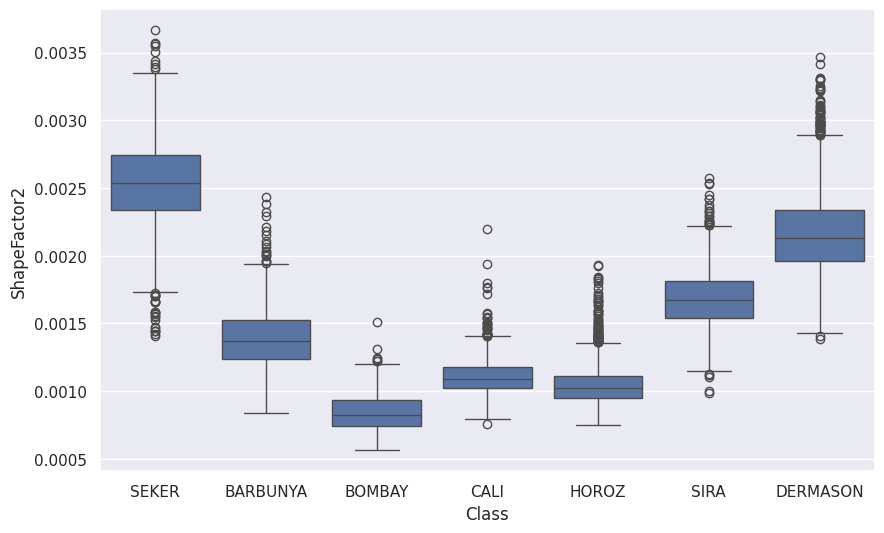

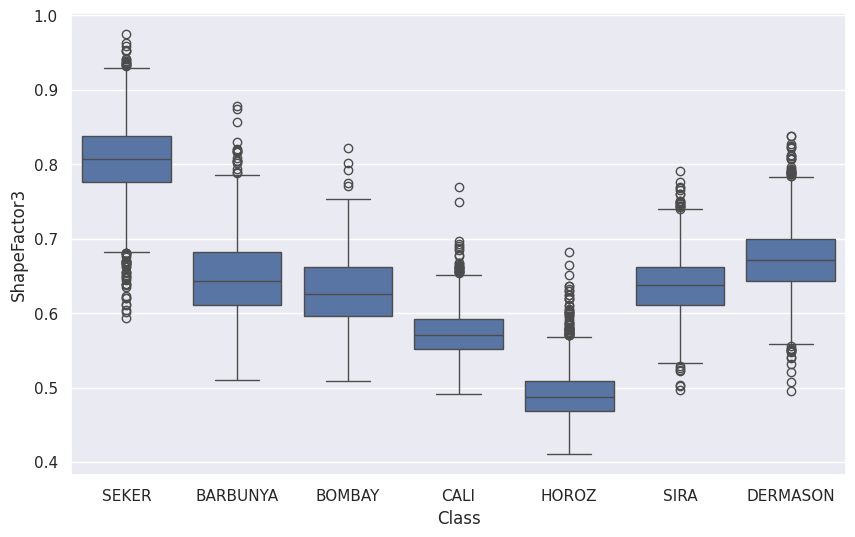

In [14]:
# Boxplots to show the distribution of features by class
for feature in data.drop(['Class'], axis=1).columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Class', y=feature, data=data)
    plt.show()


In [15]:
# Encode the target variable (e.g., 'SEKER' -> 0, etc.)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
print(f"Classes: {label_encoder.classes_}")

Classes: ['BARBUNYA' 'BOMBAY' 'CALI' 'DERMASON' 'HOROZ' 'SEKER' 'SIRA']


In [16]:
# Map classes to its number represntation
label_name_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

In [17]:
label_name_mapping

{'BARBUNYA': 0,
 'BOMBAY': 1,
 'CALI': 2,
 'DERMASON': 3,
 'HOROZ': 4,
 'SEKER': 5,
 'SIRA': 6}

In [18]:
y_encoded

array([5, 5, 5, ..., 3, 3, 3])

In [19]:
# Correlation matrix
fig1,ax1 = plt.subplots(figsize=(15,10))
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.3, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

In [20]:
X.corr()

Area  Perimeter  MajorAxisLength  MinorAxisLength  \
Area             1.000000   0.966722         0.931834         0.951602   
Perimeter        0.966722   1.000000         0.977338         0.913179   
MajorAxisLength  0.931834   0.977338         1.000000         0.826052   
MinorAxisLength  0.951602   0.913179         0.826052         1.000000   
AspectRation     0.241735   0.385276         0.550335        -0.009161   
Eccentricity     0.267481   0.391066         0.541972         0.019574   
ConvexArea       0.999939   0.967689         0.932607         0.951339   
EquivDiameter    0.984968   0.991380         0.961733         0.948539   
Extent           0.054345  -0.021160        -0.078062         0.145957   
Solidity        -0.196585  -0.303970        -0.284302        -0.155831   
roundness       -0.357530  -0.547647        -0.596358        -0.210344   
Compactness     -0.268067  -0.406857        -0.568377        -0.015066   
ShapeFactor1    -0.847958  -0.864623        -0.773609        -0.947204   
ShapeFactor2    -0.639291  -0.767592        -0.859238        -0.471347   
ShapeFactor3    -0.272145  -0.408435        -0.568185        -0.019326   
ShapeFactor4    -0.355721  -0.429310        -0.482527        -0.263749   

                 AspectRation  Eccentricity  ConvexArea  EquivDiameter  \
Area                 0.241735      0.267481    0.999939       0.984968   
Perimeter            0.385276      0.391066    0.967689       0.991380   
MajorAxisLength      0.550335      0.541972    0.932607       0.961733   
MinorAxisLength     -0.009161      0.019574    0.951339       0.948539   
AspectRation         1.000000      0.924293    0.243301       0.303647   
Eccentricity         0.924293      1.000000    0.269255       0.318667   
ConvexArea           0.243301      0.269255    1.000000       0.985226   
EquivDiameter        0.303647      0.318667    0.985226       1.000000   
Extent              -0.370184     -0.319362    0.052564       0.028383   
Solidity            -0.267754     -0.297592   -0.206191      -0.231648   
roundness           -0.766979     -0.722272   -0.362083      -0.435945   
Compactness         -0.987687     -0.970313   -0.269922      -0.327650   
ShapeFactor1         0.024593      0.019920   -0.847950      -0.892741   
ShapeFactor2        -0.837841     -0.860141   -0.640862      -0.713069   
ShapeFactor3        -0.978592     -0.981058   -0.274024      -0.330389   
ShapeFactor4        -0.449264     -0.449354   -0.362049      -0.392512   

                   Extent  Solidity  roundness  Compactness  ShapeFactor1  \
Area             0.054345 -0.196585  -0.357530    -0.268067     -0.847958   
Perimeter       -0.021160 -0.303970  -0.547647    -0.406857     -0.864623   
MajorAxisLength -0.078062 -0.284302  -0.596358    -0.568377     -0.773609   
MinorAxisLength  0.145957 -0.155831  -0.210344    -0.015066     -0.947204   
AspectRation    -0.370184 -0.267754  -0.766979    -0.987687      0.024593   
Eccentricity    -0.319362 -0.297592  -0.722272    -0.970313      0.019920   
ConvexArea       0.052564 -0.206191  -0.362083    -0.269922     -0.847950   
EquivDiameter    0.028383 -0.231648  -0.435945    -0.327650     -0.892741   
Extent           1.000000  0.191389   0.344411     0.354212     -0.141616   
Solidity         0.191389  1.000000   0.607150     0.303766      0.153388   
roundness        0.344411  0.607150   1.000000     0.768086      0.230273   
Compactness      0.354212  0.303766   0.768086     1.000000     -0.009394   
ShapeFactor1    -0.141616  0.153388   0.230273    -0.009394      1.000000   
ShapeFactor2     0.237956  0.343559   0.782824     0.868939      0.469197   
ShapeFactor3     0.347624  0.307662   0.763126     0.998686     -0.008320   
ShapeFactor4     0.148502  0.702163   0.472149     0.484436      0.248619   

                 ShapeFactor2  ShapeFactor3  ShapeFactor4  
Area                -0.639291     -0.272145     -0.355721  
Perimeter           -0.767592     -0.408435     -0.429310  
MajorAxisLeng

In [21]:
# Standardize the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)


## Principal Component Analysis (PCA)

In [23]:
# Apply PCA
pca = PCA()
Z = pca.fit_transform(X_scaled)

In [24]:
Z

array([[-4.98156099e+00,  1.82469731e+00,  7.49021037e-01, ...,
        -6.16118162e-04, -2.11823131e-03, -3.97991012e-04],
       [-5.43679225e+00,  2.93236480e+00,  2.18237398e+00, ...,
         4.80626800e-03,  2.27428496e-03, -3.12223898e-03],
       [-4.75808830e+00,  1.82688385e+00,  5.14037599e-01, ...,
         9.71269698e-04, -2.48858472e-03, -2.16616900e-04],
       ...,
       [-1.41751472e+00,  1.41193703e-01, -3.87206350e-01, ...,
        -4.17719573e-04,  9.87194155e-04, -3.20956338e-04],
       [-1.11466584e+00, -2.12679323e-01,  1.44088308e-01, ...,
        -1.23647569e-03,  1.31750687e-03, -4.93277749e-04],
       [-7.66436864e-01, -6.46514107e-01, -9.94121567e-01, ...,
         8.39075166e-04, -4.81904320e-05,  7.29007389e-04]])

In [25]:
class_labels = y.unique()
class_colors = {label: idx for idx, label in enumerate(class_labels)}
y_encoded = y.map(class_colors)

In [26]:
# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

In [27]:
# Determine the optimal number of components
n_components_95 = np.argmax(np.cumsum(explained_variance_ratio) >= 0.95) + 1
print(f"Number of PCs for 95% variance: {n_components_95}")

# Refit PCA with the optimal number of components for visualization (2 components)
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

Number of PCs for 95% variance: 4


In [28]:
# Scatter plot of first two PCs
plt.figure(figsize=(10, 6))
for label, color_idx in class_colors.items():
    plt.scatter(
        X_pca_2d[y_encoded == color_idx, 0],
        X_pca_2d[y_encoded == color_idx, 1],
        label=label
    )
plt.title('PCA Scatter Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.legend(title="Classes")
plt.show()

### Scree plot


In [29]:
plt.figure(figsize=(10, 6))
plt.plot(
    range(1, len(explained_variance_ratio) + 1),
    explained_variance_ratio,
    marker='o',
    color='r'
)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.axvline(
    x=np.argmax(np.cumsum(explained_variance_ratio) >= 0.95) + 1,
    color='b',
    linestyle='--',
    label='95% Variance'
)
plt.grid(True)
plt.legend()
plt.show()


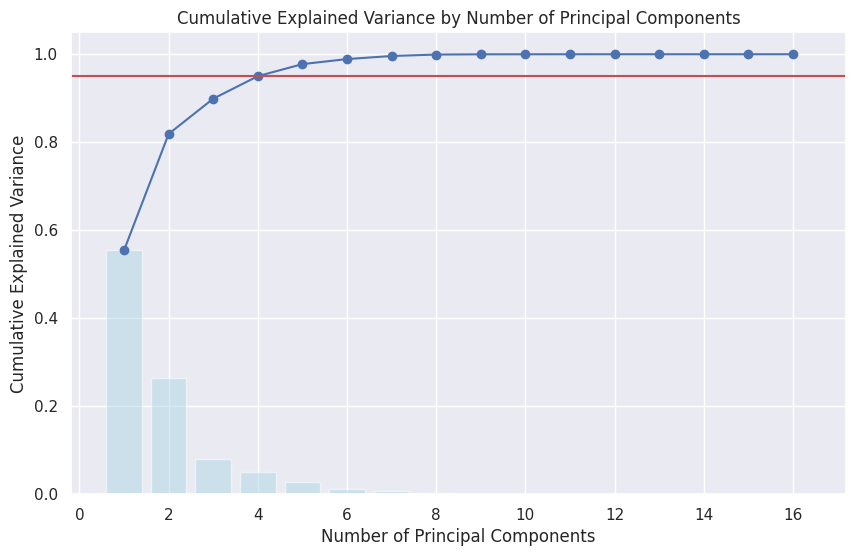

In [30]:
# Plot cumulative variance
plt.figure(figsize=(10, 6))

plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='b')
plt.axhline(y=0.95, color='r', linestyle='-')  # 95% variance line
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, color='lightblue', label='Explained Variance Ratio')

plt.title('Cumulative Explained Variance by Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [31]:
variables = X.columns  # Save feature names

In [32]:
# Initialize and perform PCA
from pca import pca
model = pca()  # By default, keeps all principal components
out = model.fit_transform(X_scaled)

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [16] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [4] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [16] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [33]:
# Access Principal Components
print(out['PC'])  # Principal component scores

            PC1       PC2       PC3       PC4
0     -4.981561  1.824697  0.749021 -0.390812
1     -5.436792  2.932365  2.182374 -0.431960
2     -4.758088  1.826884  0.514038 -0.125854
3     -4.300541  2.003661  3.554447  0.082964
4     -6.349340  4.088205  1.179199 -0.830357
...         ...       ...       ...       ...
13606 -1.125616 -0.441079 -0.875509 -0.719279
13607 -1.605011  0.495997 -0.840558  0.797433
13608 -1.417515  0.141194 -0.387206 -0.486439
13609 -1.114666 -0.212679  0.144088 -0.841903
13610 -0.766437 -0.646514 -0.994122  0.814679

[13611 rows x 4 columns]


[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


<Figure size 800x600 with 0 Axes>

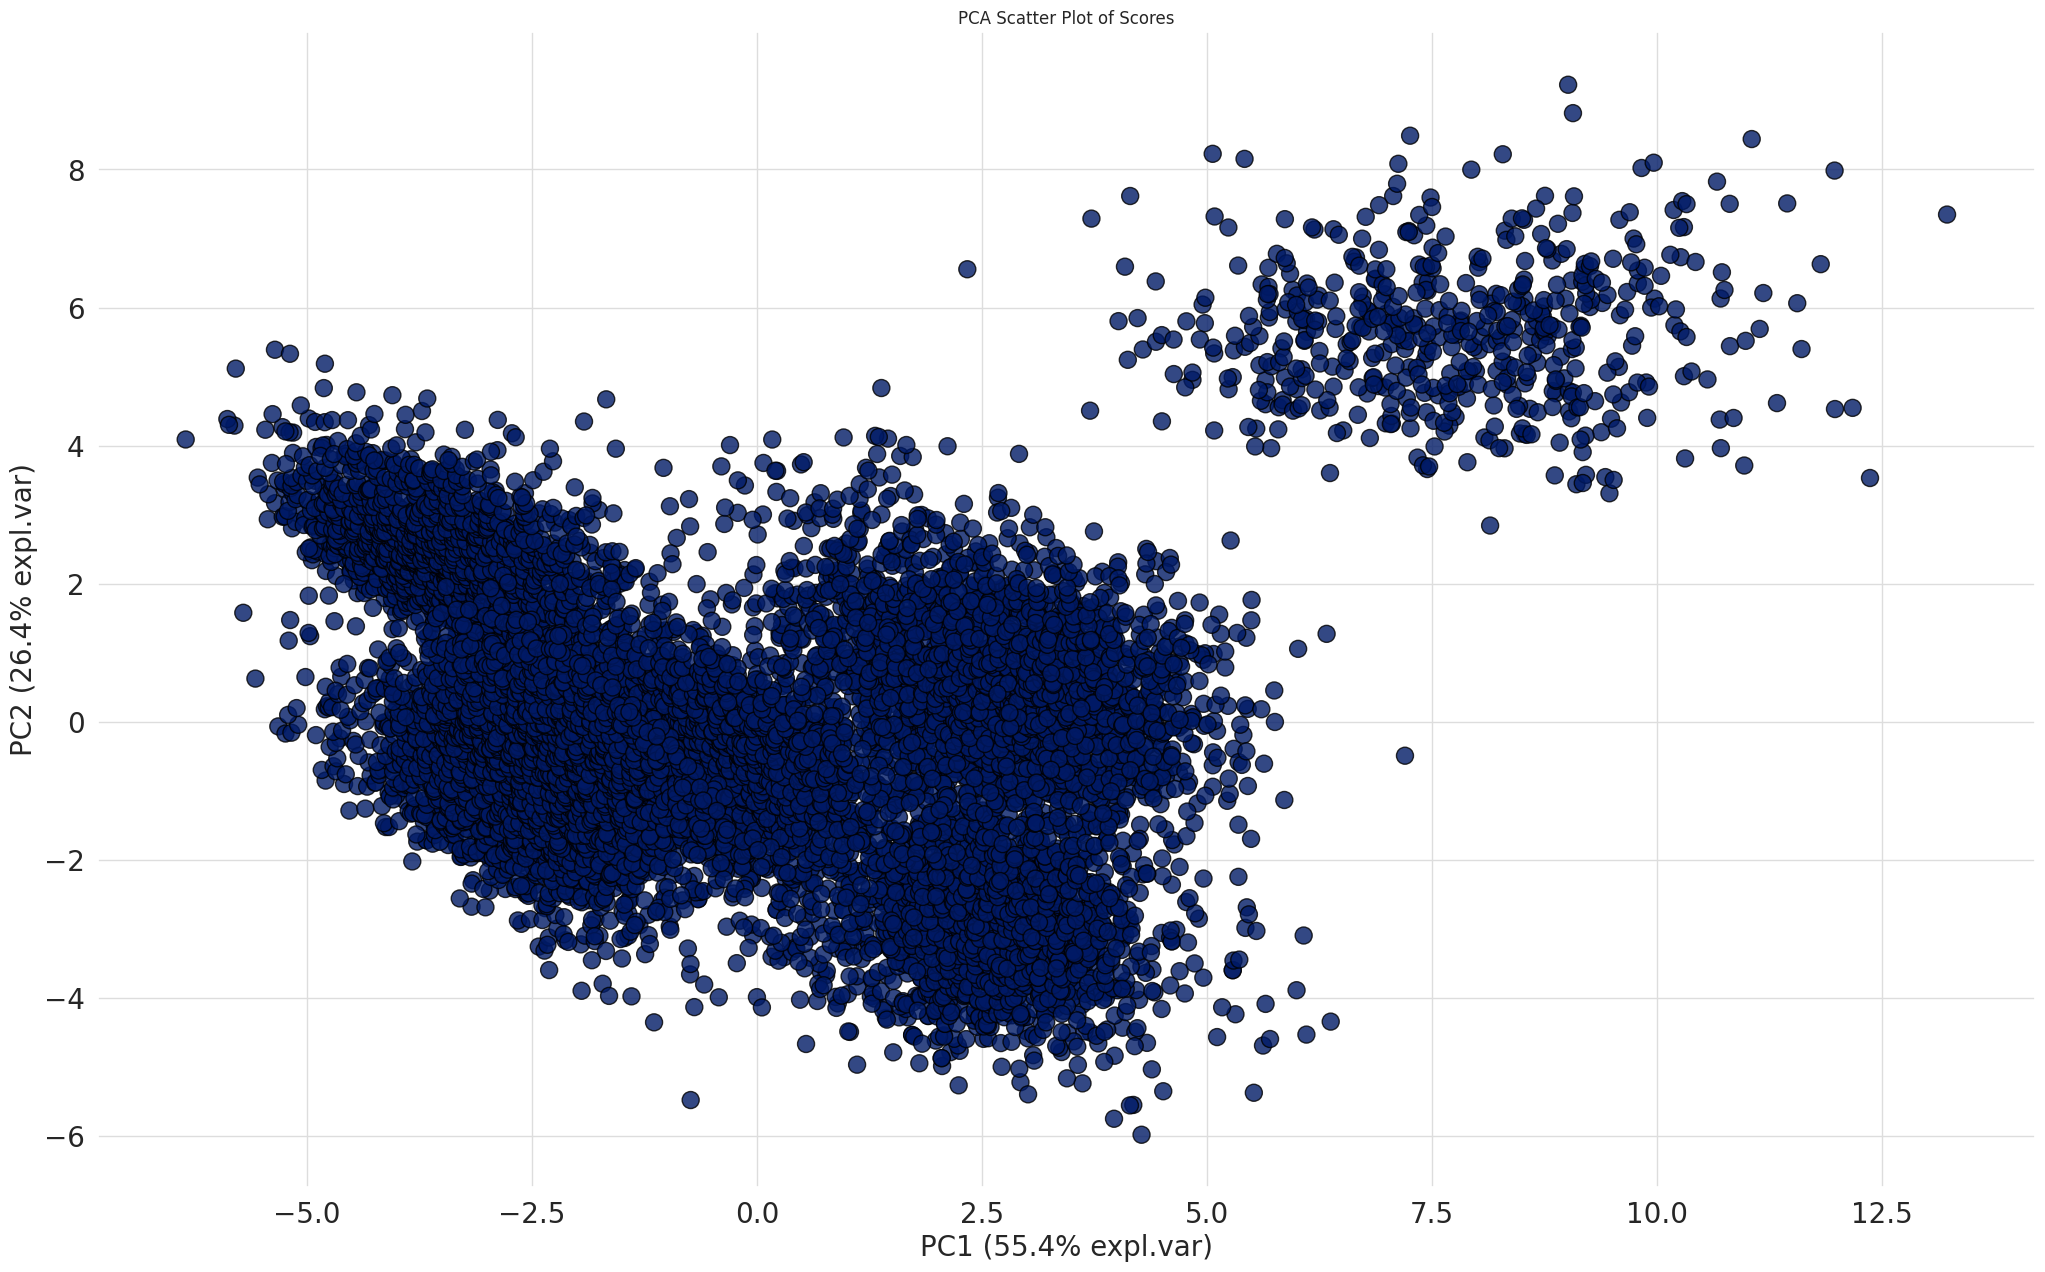

In [34]:
# Scatter Plot of PCA Scores
plt.figure(figsize=(8, 6))
model.scatter(label=True, legend=False)  # Visualizes the PCA projection with class labels
plt.title('PCA Scatter Plot of Scores')
plt.show()

In [35]:
# Eigenvectors (Loadings)
A = out['loadings'].T  # Transpose for better structure
print("Eigenvectors (Loadings):\n", A)

Eigenvectors (Loadings):
          PC1       PC2       PC3       PC4
1   0.282458  0.245882 -0.061447 -0.031546
2   0.310891  0.179303 -0.018853 -0.042468
3   0.325824  0.100757 -0.084692 -0.006793
4   0.236199  0.343461  0.007500 -0.061300
5   0.229298 -0.330844 -0.169058  0.053646
6   0.231526 -0.319434 -0.163042  0.118389
7   0.283200  0.244630 -0.053649 -0.030960
8   0.297484  0.222802 -0.049914 -0.032427
9  -0.059808  0.220619 -0.085258  0.948254
10 -0.143016  0.103322 -0.738670 -0.049546
11 -0.248165  0.214805 -0.163325  0.067482
12 -0.238378  0.328914  0.149701 -0.087156
13 -0.221319 -0.332549 -0.032623  0.072330
14 -0.314625  0.129419  0.120077 -0.046544
15 -0.238983  0.327522  0.149570 -0.095679
16 -0.198009  0.100061 -0.536903 -0.210120


In [36]:
#eigevalues
eigenvalues = out['explained_var']

In [37]:
eigenvalues

array([0.55466439, 0.81897412, 0.89903976, 0.95018056, 0.97757349,
       0.9890711 , 0.99604761, 0.99929843, 0.9998147 , 0.99990557,
       0.99997146, 0.99998983, 0.99999913, 0.99999975, 0.99999989,
       1.        ])

<ipython-input-38-2d65f95535e3>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(x=A.PC1[i] + 0.02, y=A.PC2[i] + 0.02, s=variables[i],


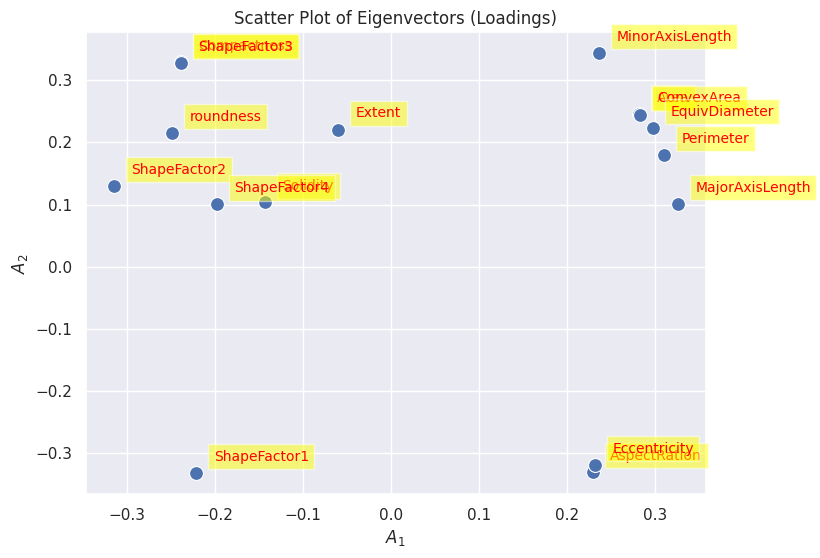

In [38]:
# Scatter Plot of Loadings
plt.figure(figsize=(8, 6))
sns.scatterplot(data=A, x="PC1", y="PC2", s=100)  # Scatter plot of loadings
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
plt.title('Scatter Plot of Eigenvectors (Loadings)')

# Annotate loadings with variable names
for i in range(A.shape[0]):
    plt.text(x=A.PC1[i] + 0.02, y=A.PC2[i] + 0.02, s=variables[i],
             fontdict=dict(color='red', size=10),
             bbox=dict(facecolor='yellow', alpha=0.5))
plt.grid(True)
plt.show()

In [39]:
# Scree Plot (Explained Variance Ratio)
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1

plt.figure(figsize=(8, 6))
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [str(i) for i in x], rotation=0)
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

<Figure size 800x600 with 0 Axes>

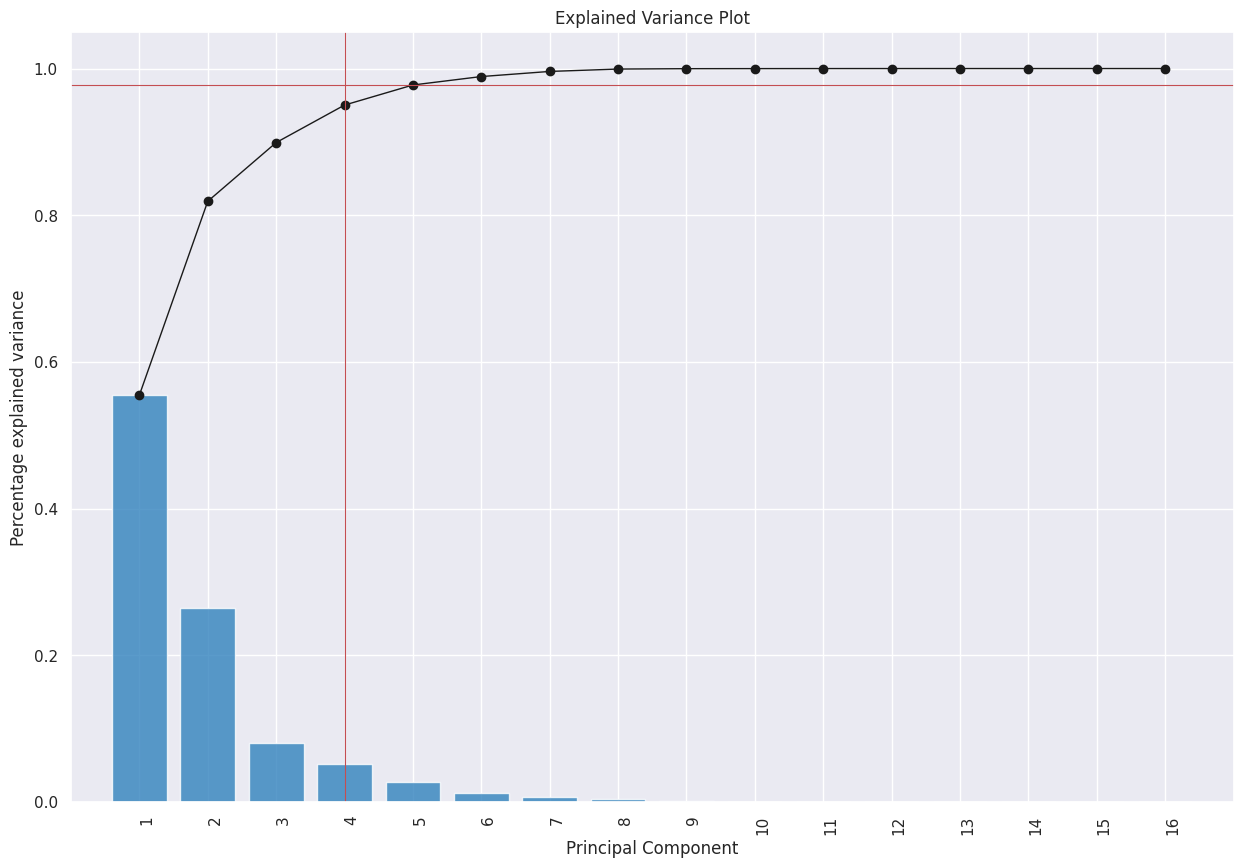

In [40]:
# Explained Variance Plot
plt.figure(figsize=(8, 6))
model.plot()  # Visualizes cumulative and individual variance
plt.title('Explained Variance Plot')
plt.show()

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


<Figure size 1000x800 with 0 Axes>

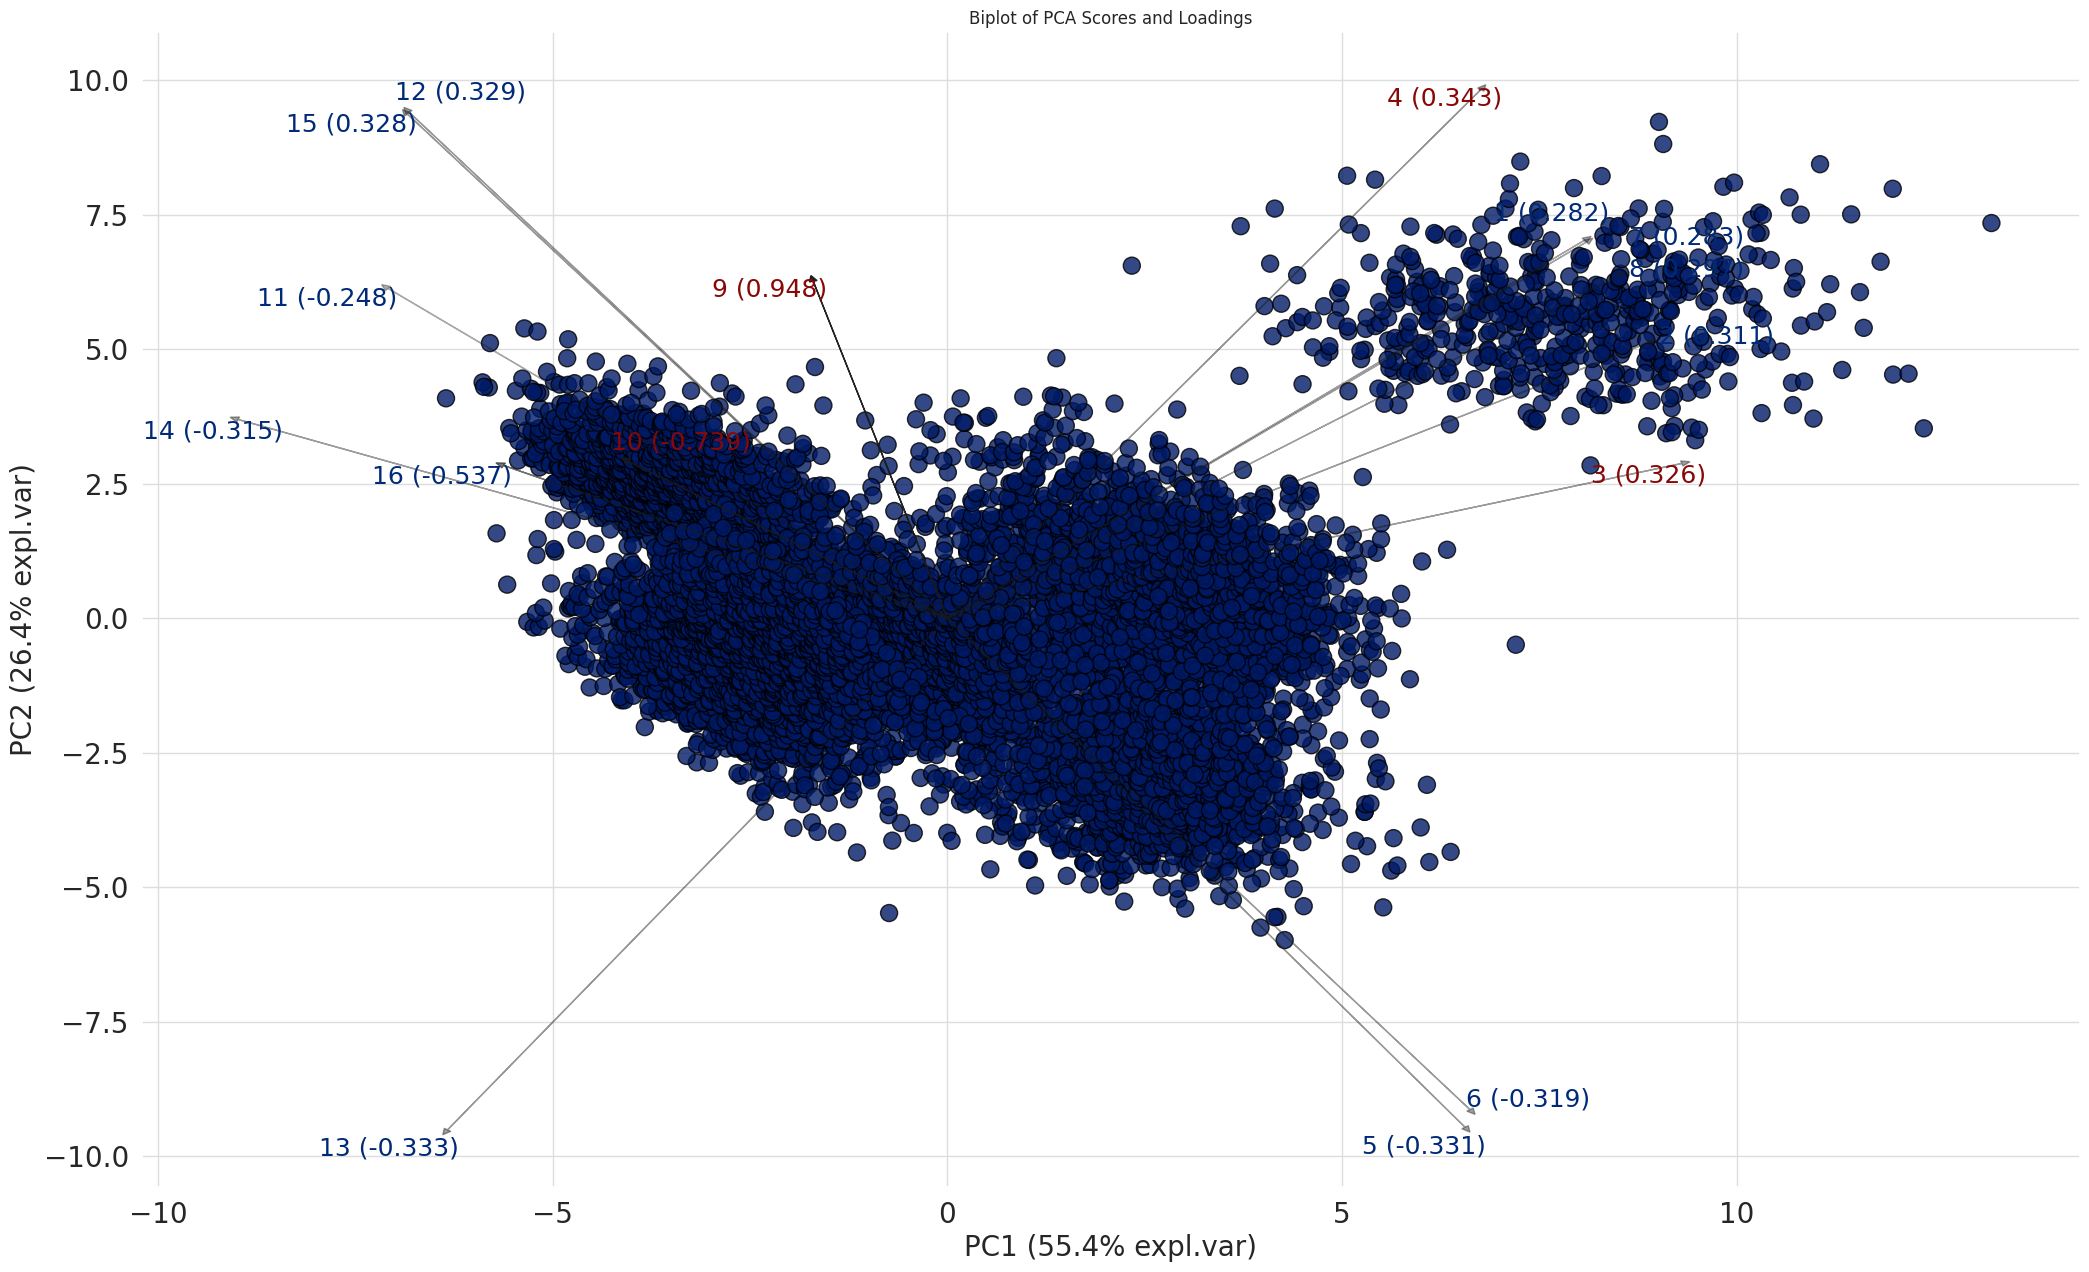

In [41]:
# Biplot: Combine PCA scores and loadings
plt.figure(figsize=(10, 8))
model.biplot(label=False, legend=False, color_arrow='k')
plt.title('Biplot of PCA Scores and Loadings')
plt.show()

In [42]:
cov_matrix = np.cov(X_scaled, rowvar=False)

# Step 3: Perform eigen decomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 4: Sort eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

In [43]:
eigenvalues

array([8.87528224e+00, 4.22926643e+00, 1.28114440e+00, 8.18312967e-01,
       4.38319068e-01, 1.83975267e-01, 1.11632319e-01, 5.20170215e-02,
       8.26086874e-03, 1.45399677e-03, 1.05426615e-03, 2.94004480e-04,
       1.48805562e-04, 1.00110039e-05, 2.14627105e-06, 1.78492305e-06])

In [44]:
eigenvectors

array([[ 2.82457959e-01,  2.45882017e-01, -6.14466784e-02,
        -3.15461943e-02, -9.13256239e-02, -3.66390031e-01,
         1.25044850e-01,  7.17479146e-02,  3.50665700e-02,
        -3.90419508e-01, -1.77686508e-01,  5.44841917e-02,
         4.62948192e-02,  6.55727932e-01,  1.33190217e-01,
         2.31436022e-01],
       [ 3.10891123e-01,  1.79302922e-01, -1.88525950e-02,
        -4.24678978e-02,  8.18198658e-02, -1.02508240e-02,
         8.15297016e-02,  3.17295057e-02, -1.57501165e-01,
         3.44383058e-01,  1.99453658e-01, -7.50549996e-01,
         3.17920228e-01,  8.13901184e-02,  1.26584592e-02,
         1.46143882e-02],
       [ 3.25823976e-01,  1.00756515e-01, -8.46919062e-02,
        -6.79308171e-03, -4.42163130e-02, -1.49091961e-02,
         1.18162545e-01, -2.00947005e-01, -3.52366424e-01,
         1.01996462e-01,  1.73639719e-01,  2.73550308e-02,
        -6.85301954e-01, -1.86251286e-01,  1.74431465e-01,
         3.46019470e-01],
       [ 2.36199383e-01,  3.43460651e

In [45]:
from pca import pca
modela = pca(n_components=4)  # By default, keeps all principal components
outt = modela.fit_transform(X_scaled)

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed on the [16] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [46]:
out['loadings']

1         2         3         4         5         6         7  \
PC1  0.282458  0.310891  0.325824  0.236199  0.229298  0.231526  0.283200   
PC2  0.245882  0.179303  0.100757  0.343461 -0.330844 -0.319434  0.244630   
PC3 -0.061447 -0.018853 -0.084692  0.007500 -0.169058 -0.163042 -0.053649   
PC4 -0.031546 -0.042468 -0.006793 -0.061300  0.053646  0.118389 -0.030960   

            8         9        10        11        12        13        14  \
PC1  0.297484 -0.059808 -0.143016 -0.248165 -0.238378 -0.221319 -0.314625   
PC2  0.222802  0.220619  0.103322  0.214805  0.328914 -0.332549  0.129419   
PC3 -0.049914 -0.085258 -0.738670 -0.163325  0.149701 -0.032623  0.120077   
PC4 -0.032427  0.948254 -0.049546  0.067482 -0.087156  0.072330 -0.046544   

           15        16  
PC1 -0.238983 -0.198009  
PC2  0.327522  0.100061  
PC3  0.149570 -0.536903  
PC4 -0.095679 -0.210120

In [47]:
outt['explained_var']

array([0.55466439, 0.81897412, 0.89903976, 0.95018056])

In [48]:
outt

{'loadings':             1         2         3         4         5         6         7  \
 PC1  0.282458  0.310891  0.325824  0.236199  0.229298  0.231526  0.283200   
 PC2  0.245882  0.179303  0.100757  0.343461 -0.330844 -0.319434  0.244630   
 PC3 -0.061447 -0.018853 -0.084692  0.007500 -0.169058 -0.163042 -0.053649   
 PC4 -0.031546 -0.042468 -0.006793 -0.061300  0.053646  0.118389 -0.030960   
 
             8         9        10        11        12        13        14  \
 PC1  0.297484 -0.059808 -0.143016 -0.248165 -0.238378 -0.221319 -0.314625   
 PC2  0.222802  0.220619  0.103322  0.214805  0.328914 -0.332549  0.129419   
 PC3 -0.049914 -0.085258 -0.738670 -0.163325  0.149701 -0.032623  0.120077   
 PC4 -0.032427  0.948254 -0.049546  0.067482 -0.087156  0.072330 -0.046544   
 
            15        16  
 PC1 -0.238983 -0.198009  
 PC2  0.327522  0.100061  
 PC3  0.149570 -0.536903  
 PC4 -0.095679 -0.210120  ,
 'PC':             PC1       PC2       PC3       PC4
 0     -4.98156

In [79]:
loadings = out['loadings']

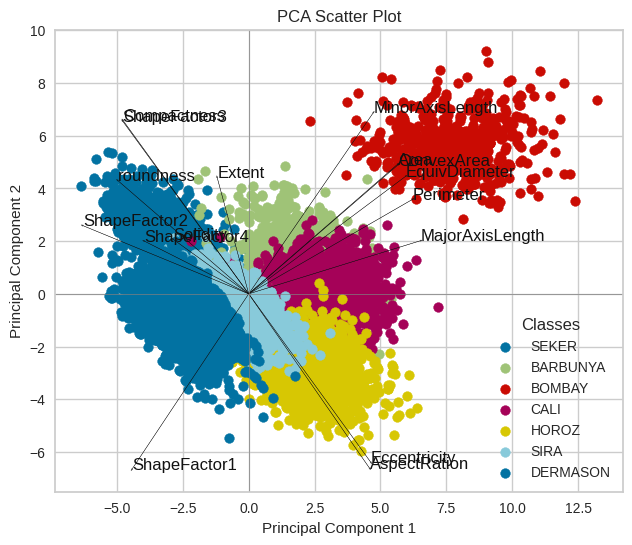

In [82]:
# Step 1: Create biplot
plt.figure(figsize=(10, 6))

# Plot the PCA scores (dots), assuming 'outt' contains PCA scores for the first 2 components
#plt.scatter(out[:, 0], out[:, 1])

for label, color_idx in class_colors.items():
    plt.scatter(
        X_pca_2d[y_encoded == color_idx, 0],
        X_pca_2d[y_encoded == color_idx, 1],
        label=label
    )
plt.legend(title="Classes")

# Step 2: Plot the loadings (arrows) with lengthened arrows
for i in range(len(variables)):
    # Increase the scaling factor (adjust this factor to lengthen the arrows)
    plt.arrow(0, 0, loadings.iloc[0, i] * 20, loadings.iloc[1, i] * 20, color='k', alpha=0.7, head_width=0.05)

    # Add feature names at the tip of the arrows
    plt.text(loadings.iloc[0, i] * 20, loadings.iloc[1, i] * 20, variables[i], color='k')

# Adjust the plot settings and display
plt.axhline(0, color='grey',linewidth=0.5)
plt.axvline(0, color='grey',linewidth=0.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.title('PCA Scatter Plot')

plt.grid(True)
plt.legend(title="Classes")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Classification without PCA

In [49]:
# Split the data into training and unseen datasets
data_seen = data.sample(frac=0.9, random_state=786)  # 90% for training and validation
data_unseen = data.drop(data_seen.index)  # Remaining 10% for unseen data

In [50]:
# Reset indices for clean splits
data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

# Check the shape of the splits
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data for Predictions: ' + str(data_unseen.shape))

Data for Modeling: (13611, 17)
Unseen Data for Predictions: (1361, 17)


In [51]:
# PyCaret Setup: Initialize the classification environment
from pycaret.classification import *
clf = setup(data=data_seen,
            target='Class',  # Target variable is 'Class'
            train_size=0.7,  # 70% for training, 30% for validation
            session_id=123)  # For reproducibility

In [52]:
#show the best model and their statistics
best_model = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

# main

In [53]:
# PyCaret Setup: Initialize the classification environment
from pycaret.classification import *
clf = setup(data=data,
            target='Class',  # Target variable is 'Class'
            train_size=0.7,  # 70% for training, 30% for validation
            session_id=123)  # For reproducibility

In [54]:
#show the best model and their statistics
best_model = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [55]:
best_model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [56]:
lr = create_model('lr')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [57]:
tuned_lr=tune_model(lr)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [58]:
tuned_lr

LogisticRegression(C=6.718000000000001, class_weight={}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# Classification + PCA

In [70]:
clf = setup(data=data,
            target='Class',  # Target variable is 'Class'
            train_size=0.7,  # 70% for training, 30% for validation
            session_id=123,  # For reproducibility
            normalize=True,  # Standardize numerical features
            pca=True,  # Enable PCA
            pca_components=4)  # Reduce to 4 principal components

In [71]:
#show the best model and their statistics
best_model_pca = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [72]:
best_model_pca

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [73]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Initiated  . . . . . . . . . . . . . . . . . .                      18:37:00
Status     . . . . . . . . . . . . . . . . . .     Searching Hyperparameters
Estimator  . . . . . . . . . . . . . . . . . .  Gradient Boosting Classifier

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


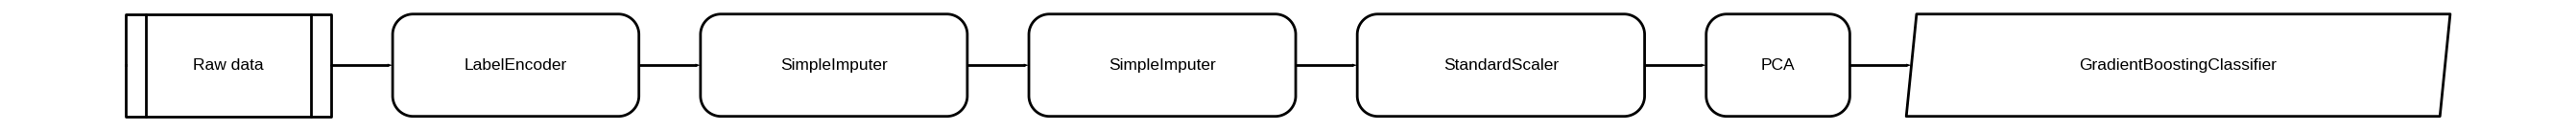

In [74]:
evaluate_model(tuned_best_model_pca)

Random forest classifier

In [75]:
rf = create_model('rf')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [76]:
rf_tuned = tune_model(rf)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [77]:
evaluate_model(rf_tuned)

extra Tree Classifier

In [78]:
et = tune_model('et')

TypeError: The behavior of tune_model in version 1.0.1 is changed. Please pass trained model object.

In [ ]:
et_tuned = tune_model('et')

In [ ]:
evaluate_model(et_tuned)

Quadrantic Discrimainat Analysis

In [ ]:
qda = create_model('qda')

In [ ]:
qda_tuned = tune_model(qda)

In [ ]:
evaluate_model(qda_tuned)

Linear discrimant Analysis

In [ ]:
lda = create_model('lda')

In [ ]:
lda_tuned = tune_model(lda)

In [ ]:
evaluate_model(lda_tuned)

Gradianet boosting classifier

In [ ]:
gbc = create_model('gbc')

In [ ]:
gbc_tuned = tune_model(gbc)

In [ ]:
evaluate_model(gbc_tuned)

Setting functions

In [107]:
class_mapping = {
    0: 'BARBUNYA',
    1: 'BOMBAY',
    2: 'CALI',
    3: 'DERMASON',
    4: 'HOROZ',
    5: 'SEKER',
    6: 'SIRA'
}

results = []
sets = ['TP', 'FP', 'FN', 'TN']

In [104]:
def convert_to_confusion_matrix(cm):
    n_classes = cm.shape[0]
    for i in range(n_classes):
      TP = cm[i, i]
      FP = cm[:, i].sum() - TP
      FN = cm[i, :].sum() - TP
      TN = cm.sum() - (TP + FP + FN)
      results.append({"Class": class_mapping[i], "TP": TP, "FP": FP, "FN": FN, "TN": TN})

    metric_sum = {}

    for t in sets:
      value = 0
      total = 0
      for i in range(0, len(results)):
          value = results[i][t]
          total = total + value
          h = t
      metric_sum[h] = total
    return metric_sum


In [109]:
def plot_my_confusion_matrix(cm, classes=classes):
      # Calculate the sum of each metric
    metric_sums = convert_to_confusion_matrix(cm)

    # Data for the confusion plot
    labels = list(metric_sums.keys())
    values = list(metric_sums.values())

    # Plotting the bar chart
    plt.figure(figsize=(8, 5))
    bars = plt.bar(labels, values, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

    # Adding value annotations
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 50, int(yval), ha='center', va='bottom')

    # Adding titles and labels
    plt.title('Sum of Confusion Metrics Across All Classes', fontsize=14)
    plt.ylabel('Counts', fontsize=12)
    plt.xlabel('Metrics', fontsize=12)
    plt.ylim(0, max(values) + 500)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # Sum up True Positives, False Positives, False Negatives, and True Negatives
    TP = np.trace(cm)  # Sum of diagonal elements (True Positives)
    FP = cm.sum(axis=0) - np.diag(cm)  # Column-wise sum minus diagonal elements
    FN = cm.sum(axis=1) - np.diag(cm)  # Row-wise sum minus diagonal elements
    TN = cm.sum() - (TP + FP.sum() + FN.sum())  # Total sum minus all other elements

    # Simplified 2x2 confusion matrix
    simplified_cm = np.array([[TP, FN.sum()], [FP.sum(), TN]])

    # Plotting the simplified confusion matrix
    plt.figure(figsize=(5, 5))
    plt.imshow(simplified_cm, cmap='Blues', interpolation='nearest')
    plt.title('Simplified Confusion Matrix (2x2)', fontsize=14)
    plt.colorbar()

    # Add annotations
    classes = ['Positive', 'Negative']
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, ['Actual ' + label for label in classes], rotation=45, fontsize=10)
    plt.yticks(tick_marks, ['Predicted ' + label for label in classes], fontsize=10)

    for i in range(2):
        for j in range(2):
            plt.text(j, i, f'{simplified_cm[i, j]}', ha='center', va='center', color='black', fontsize=12)

    plt.ylabel('Predicted Label', fontsize=12)
    plt.xlabel('True Label', fontsize=12)
    plt.tight_layout()
    plt.show()

    simplified_cm

In [112]:
def get_cm(modell):
    predictions = predict_model(modell)
    y_true = predictions['Class']  # Actual values
    y_pred = predictions['prediction_label']   # Predicted values

    # Generate confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    return cm

    # Display the confusion matrix


In [110]:
def perform_cm(modell):
    cm = get_cm(modell)
    plot_my_confusion_matrix(cm)



get confusion matrix of all models


In [113]:
# Get predictions for the test set
perform_cm(tuned_best_model_pca)



In [ ]:
perform_cm(rf_tuned)

In [86]:


# Import confusion_matrix from sklearn and calculate it
from sklearn.metrics import confusion_matrix
y_true = predictions['Class']  # Actual values
y_pred = predictions['prediction_label']   # Predicted values

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[297   0  78   0   2   3  17]
 [  1 156   0   0   0   0   0]
 [ 75   0 396   0  13   1   4]
 [  0   0   0 977   4  15  68]
 [  3   0   6   7 546   0  16]
 [  3   0   0  12   0 570  23]
 [  9   0   1  93  10  10 668]]


In [88]:
type(cm)

numpy.ndarray

In [87]:
plot_model(rf_tuned, plot='confusion_matrix', )

array([[3610,  474],
       [ 474, -474]])

In [100]:
# Correct computation of confusion matrix metrics
TP = np.trace(cm)  # True Positives (sum of diagonal elements)
FN = cm.sum(axis=1) - np.diag(cm)  # False Negatives (row sums minus diagonal)
FP = cm.sum(axis=0) - np.diag(cm)  # False Positives (column sums minus diagonal)
TN = cm.sum() - (TP + FP.sum() + FN.sum())  # True Negatives (total sum - TP - FP - FN)

# Ensure all values are positive and valid
simplified_cm = np.array([[TP, FN.sum()], [FP.sum(), TN]])

# Data for bar chart
metrics = ['TP', 'FN', 'FP', 'TN']
values = [simplified_cm[0, 0], simplified_cm[0, 1], simplified_cm[1, 0], simplified_cm[1, 1]]

# Plotting the corrected bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(metrics, values, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

# Adding value annotations
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50, int(yval), ha='center', va='bottom')

# Adding titles and labels
plt.title('Confusion Metrics Overview (Corrected)', fontsize=14)
plt.ylabel('Counts', fontsize=12)
plt.xlabel('Metrics', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

simplified_cm


array([[3610,  474],
       [ 474, -474]])

In [ ]:
"""clf = setup(data=data,
            target='Class',  # Target variable is 'Class'
            train_size=0.7,  # 70% for training, 30% for validation
            session_id=123,  # For reproducibility
            normalize=True,  # Standardize numerical features
            pca=True,  # Enable PCA
            pca_components=3)  # Reduce to 3 principal components
"""

In [ ]:
"""#show the best model and their statistics
best_model = compare_models()"""

In [ ]:
"""clf = setup(data=data,
            target='Class',  # Target variable is 'Class'
            train_size=0.7,  # 70% for training, 30% for validation
            session_id=123,  # For reproducibility
            normalize=True,  # Standardize numerical features
            pca=True,  # Enable PCA
            pca_components=2)  # Reduce to 2 principal components"""

In [ ]:
"""#show the best model and their statistics
best_model = compare_models()"""

In [ ]:
"""# Predict and evaluate
y_pred = clf.predict(X_test_pca_optimal)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")"""